In [1]:
import pickle
import matplotlib
#matplotlib.use('agg')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try: 
    #assert 1 == 2 # uncomment to break try
    with open('unraveled_links.p','rb') as handle:
        unravel = pickle.load(handle)

except:
    import dask.bag as db
    from t_analysis_purepy import web_iter, map_wrapper
    grid = {}
    grid['b']=[0,1,2,3,4]
    query_list = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Neutron']
    grid['search_term'] = [ (i, q) for i,q in enumerate(query_list) ]
    from sklearn.grid_search import ParameterGrid
    grid = list(ParameterGrid(grid))
    grid = [(dicti['search_term'][0],dicti['search_term'][1],dicti['b']) for dicti in grid ]
    import dask.bag as db
    grid = db.from_sequence(grid,npartitions = 8)
    list_per_links = list(db.map(web_iter,grid).compute())
    remove_empty = [i for i in list_per_links if len(i)>0 ]
    unravel = []
    for i in remove_empty:
        unravel.extend(i)
    with open('unraveled_links.p','wb') as handle:
        pickle.dump(unravel,handle)
import pandas as pd


6.52809751284
1.76882071677
0.0
8.15298769146121
9.427874111384359
0.037864354708536246


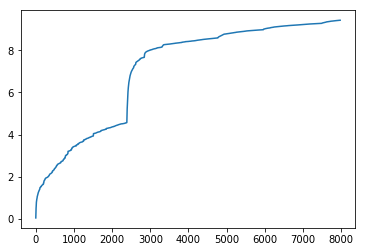

In [41]:
freqs = [  u['frequencies'] for u in unravel ]
freqs = [ (v,k) for f in freqs for k,v in f  ]
# create a dictionary of container keys with all values set to 0.
giantmodel = { fs[0]:0 for fs in freqs }
# if fdict already has count data for that word/token add currently found count data to existing data.
for i in freqs:
    giantmodel[str(i[0])] = giantmodel[str(i[0])] + i[1]
    
gm = sum([ v for k,v in giantmodel.items() ])    
probs = [ (float(v)/gm, k) for k,v in giantmodel.items() ]
probs = [ (p[0],p[1]) for p in probs if p[0] > 0.]
ents = {}
ent = 0
import math
for p in probs:
    if p[0] > 0.:
        ent -= p[0] * math.log(p[0], 2)
        ents[p[1]] = ent
#obj_arr['eofh'] = ent

#print(fdicts)
import pdb
#pdb.set_trace()
#federate_frequencies =  []
yentropies = [ v['eofh'] for v in unravel ]
import numpy as np
print(np.mean(yentropies))
print(np.var(yentropies))
print(min(yentropies))
print(max(yentropies))
print(max([v for v in ents.values() ]))
print(min([v for v in ents.values() ]))

wns = [ x for x in range(0,len(ents)) ]
plt.clf()
plt.plot(wns,list(ents.values()))
plt.title('Zipf curve')
#plt.plot(wns,bing_entropies)
#plt.plot(wns,ddg_entropies)
plt.show()



1200
1200
7974


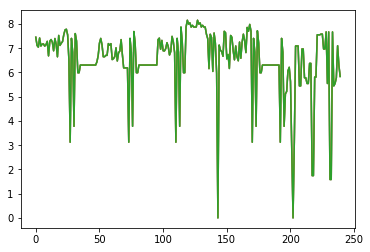

240 1200 240


In [37]:
crude_text = [ f for f in unravel ] 
stat_items = [ f['urlDat'] for f in unravel ] 

unravel[0]['urlDat'];
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from scipy.stats import pearsonr
import numpy as np

rfr = RandomForestRegressor(n_estimators=25)
lm = LinearRegression()

X = [ list(c['urlDat'].values())[0:-1] for c in crude_text ]

print(len(yentropies))
print(len(word_names))
print(len(ents))

gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
ddg_text = list(filter(lambda x: x['urlDat']['se'] == 'duckduckgo_', crude_text))
bing_text = list(filter(lambda x: x['urlDat']['se'] == 'bing_', crude_text))
gword_names = [ c['urlDat']['keyword'] for c in gsc_text ]
#print(gword_names)
gsc_entropies = [e['eofh'] for e in gsc_text if e['urlDat']['se'] == 'gScholar_' ]
bing_entropies = [e['eofh'] for e in bing_text if e['urlDat']['se'] == 'bing_']
ddg_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'duckduckgo_'] 

wns = [ x for x in range(0,len(gsc_text)) ]
plt.clf()
plt.plot(wns,gsc_entropies)
plt.plot(wns,bing_entropies)
plt.plot(wns,ddg_entropies)
plt.show()
print(len(ddg_text),len(crude_text),len(bing_text))

#print(ddg_text[-1])
#print(bing_text[-1])

In [33]:

#print(X)
#Xs = [ j 
      
Xs = []
y = []    
for i in X:
    temp = []      
    for k,j in enumerate(i[:-2]):
        if type(j) is not type(str()):
            
            temp.append(j)
        elif y==3:
            y.append(j)
    Xs.append(temp)          
      
features = np.array(Xs)
print(len(Xs),len(yentropies))
target = yentropies
regressor = rfr.fit(features,target)
lm = lm.fit(features,yentropies)

print('linear model regression')
print(lm.score(features,yentropies))
print('random forest regression')
print(regressor.score(features,target))

regressor.verbose = 1
print(regressor)
from sklearn.linear_model import LinearRegression,Lasso

def scorer(est,X,y):
    """Computes the Pearson correlation between predicted and observed values"""
    predicted = est.predict(X).squeeze()
    actual = y.squeeze()
    if predicted.var()==0:
        r = 0
    else:
        r,p = pearsonr(predicted,actual)    
    return r



1200 1200
0.903574310598
0.999971445587
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
           verbose=1, warm_start=False)


In [5]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA()
data = features
print(np.shape(features))
pca = PCA(n_components=13).fit(data)
data_rotated = np.dot(pca.components_,data.T).T


        
def report_mean_var(data):
    for i in range(data.shape[1]):
        column = data[:,i]
        print("Dimension %d has mean %.2g and variance %.3g" % \
              (i+1,column.mean(),column.var()))
name='word_complexity'
#summarize(data_rotated,name)        
report_mean_var(data_rotated)
        

(1200, 13)
Dimension 1 has mean 8.9e+02 and variance 4.13e+06
Dimension 2 has mean 1.4e+02 and variance 2.99e+05
Dimension 3 has mean -28 and variance 5.1e+04
Dimension 4 has mean 21 and variance 2.35e+03
Dimension 5 has mean -12 and variance 214
Dimension 6 has mean 23 and variance 126
Dimension 7 has mean 5.6 and variance 61.3
Dimension 8 has mean -20 and variance 9.32
Dimension 9 has mean 3.7 and variance 4.92
Dimension 10 has mean -11 and variance 0.342
Dimension 11 has mean 1 and variance 0.00946
Dimension 12 has mean 0.076 and variance 0.00761
Dimension 13 has mean -3.8 and variance 0.00339


In [6]:
bings = [ f for f in unravel if f['urlDat']['se'] =='bing_']
googles = [ f for f in unravel if f['urlDat']['se'] =='google_']
GMOs = [ f for f in unravel if f['urlDat']['keyword'] =='GMO']
GMO_standard = [ f['urlDat']['standard'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_rank = [ f['urlDat']['link_rank'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_pol = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_sent = [ f['urlDat']['ss'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
crude_text = [ f for f in unravel ] 
stat_items = [ f['urlDat'] for f in unravel ] 
gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
unravel[0]['urlDat']
gsc = list(filter(lambda x: x['se'] == 'gScholar_', stat_items))
scholar_wc = [ f['wcount'] for f in gsc ] 

In [7]:
print(scholar_wc)



[863, 463, 448, 850, 763, 615, 616, 322, 337, 825, 395, 1021, 806, 753, 501, 825, 399, 569, 967, 770, 455, 820, 1121, 898, 832, 1116, 304, 12, 11656, 7217, 135, 914, 679, 113, 113, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 364, 333, 848, 790, 766, 333, 333, 264, 264, 781, 782, 908, 390, 355, 350, 489, 302, 535, 786, 926, 326, 294, 294, 294, 294, 12, 11656, 7217, 135, 870, 689, 113, 113, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 528, 873, 680, 689, 531, 281, 321, 555, 287, 229, 434, 430, 454, 290, 12, 11656, 7217, 135, 796, 637, 113, 113, 796, 773, 734, 770, 796, 661, 796, 796, 796, 773, 734, 770, 796, 661, 796, 796, 734, 758, 630, 743, 776, 522, 775, 812, 563, 1, 853, 346, 304, 305, 926, 876, 314, 295, 318, 599, 916, 351, 318, 717, 299, 300, 813, 276, 685, 808, 804, 299, 883, 870, 931, 870, 12, 11656, 7217, 135, 824, 748, 113, 113, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 12, 11656, 7217, 135, 40, 63, 

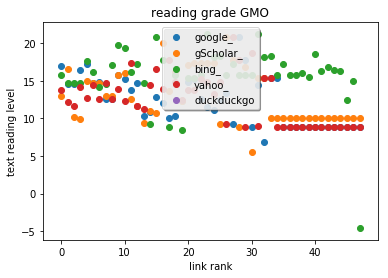

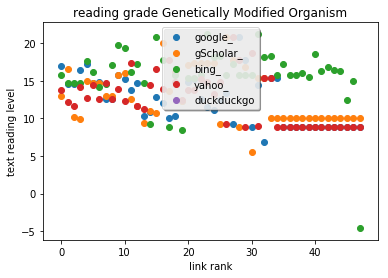

In [25]:
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'
se[4] = 'duckduckgo'

ses = list(se.values())
#search_query = str('Vaccine')
searchList = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Play Dough']
xx = []
yy = []
for outer,search_query in enumerate(searchList):    
    x = []
    y = []
    for i,v in enumerate(ses):
        #print(i,v)
        complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        rank = [ f['urlDat']['link_rank'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        x.append(rank)
        y.append(complexity)
    #if len(xx)!= 0 and len(yy) !=0:
    xx.append(x)
    yy.append(y)
    #print(len(complexity),len(rank))
plt.clf()

fig, ax = plt.subplots()
plt.title(str('reading grade ')+'GMO')
plt.ylabel('text reading level')
plt.xlabel('link rank')
plt.scatter(xx[0][0],yy[0][0],label=ses[0])
plt.scatter(xx[1][0],yy[1][0],label=ses[1])
plt.scatter(xx[2][0],yy[2][0],label=ses[2])
plt.scatter(xx[3][0],yy[3][0],label=ses[3])
plt.scatter(xx[4][0],yy[4][0],label=ses[4])

legend = ax.legend(loc='upper center', shadow=True)
plt.show()
#plt.savefig('rank_versus_complexity_{0}.png'.format(search_query))
plt.clf()

fig, ax = plt.subplots()
plt.title(str('reading grade ')+'Genetically Modified Organism')
plt.ylabel('text reading level')
plt.xlabel('link rank')
plt.scatter(xx[0][1],yy[0][1],label=ses[0])
plt.scatter(xx[1][1],yy[1][1],label=ses[1])
plt.scatter(xx[2][1],yy[2][1],label=ses[2])
plt.scatter(xx[3][1],yy[3][1],label=ses[3])
plt.scatter(xx[4][1],yy[4][1],label=ses[4])

legend = ax.legend(loc='upper center', shadow=True)
plt.show()



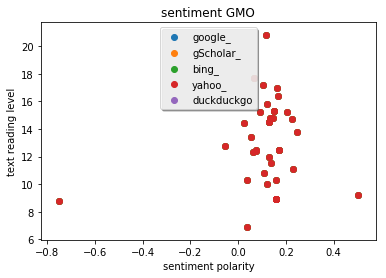

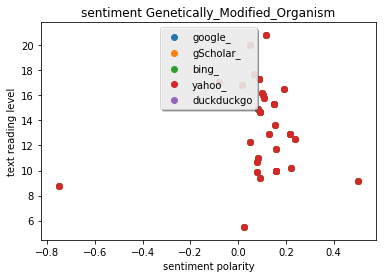

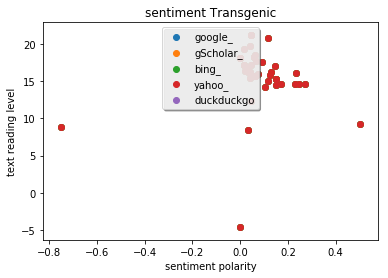

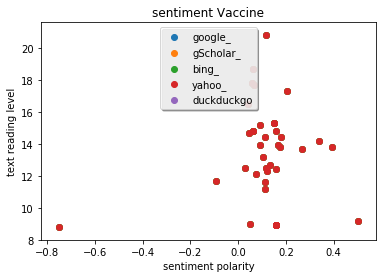

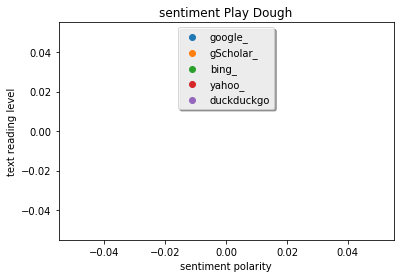

In [27]:
# 2.       Pro/anti/neutral vs. text complexity#

for outer,search_query in enumerate(searchList):    
    x = []
    y = []
    for i,v in enumerate(ses):
        #print(i,v)
        complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        sent = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        #print(complexity[0][0],complexity[0][0])
        x.append(sent)
        y.append(complexity)

    fig, ax = plt.subplots()
    plt.title(str('sentiment ')+search_query)
    plt.ylabel('text reading level')
    plt.xlabel('sentiment polarity')
    labels = [ses[0],ses[1],ses[2],ses[3]]
    #lineObjects = 
    plt.scatter(x[0],y[0],label=ses[0])
    plt.scatter(x[1],y[1],label=ses[1])
    plt.scatter(x[2],y[2],label=ses[2])
    plt.scatter(x[3],y[3],label=ses[3])
    plt.scatter(x[4],y[4],label=ses[4])


    legend = ax.legend(loc='upper center', shadow=True)
    plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))
    plt.show()

    plt.clf()
plt.show()
#plt.close()


1 0


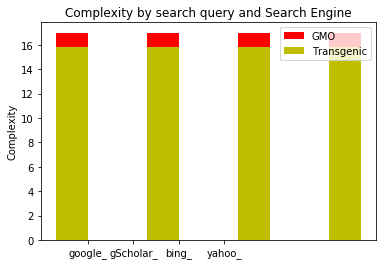

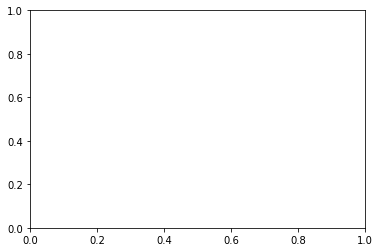

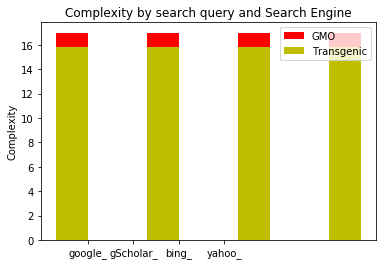

In [29]:
# 3.       GMO/transgenics vs. text complexity

import seaborn as sns
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'

ses = list(se.values())
search_query = str('Vaccine')
search_query = ['GMO','Transgenic']
xx=[]
yy=[]
for outer,sq in enumerate(search_query):    
    x = []
    y = []
    for i,v in enumerate(ses):
        complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v and f['urlDat']['link_rank'] == 0 ]
        if len(complexity)>0:
            comp = float(complexity[0])
        else:
            comp = 0
        xx.append(i)
        y.append(comp)    
    yy.append(y)
print(len(complexity),len(rank))
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
plt.show()

plt.clf()
fig, ax = plt.subplots()

#f, axarr = plt.subplots(1, sharex=True)
ind = [i for i,v in enumerate(ses)]
offset = [(i+width)/2.0 for i,v in enumerate(ses)]

rects1 = ax.bar(ind,yy[0],width, color='r')# yerr=men_std)
rects2 = ax.bar(ind, yy[1], width, color='y')#, yerr=women_std)
# add some text for labels, title and axes ticks
ax.set_ylabel('Complexity')
ax.set_title('Complexity by search query and Search Engine')
ax.set_xticks(offset)
ax.set_xticklabels((se[0], se[1], se[2], se[3]))#, 'G5'))

ax.legend((rects1[0], rects2[0]), ('GMO', 'Transgenic'))
plt.show()
#plt.savefig('GMO_Transgenic_complexity_{0}{1}.png'.format(search_query[0],search_query[1]))
import numpy as np


1 0


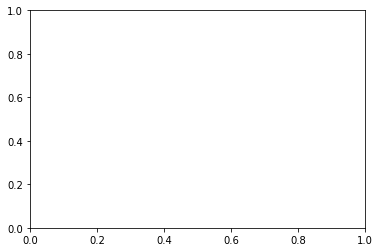

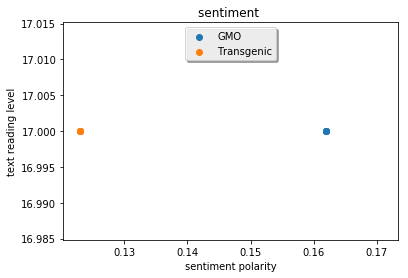

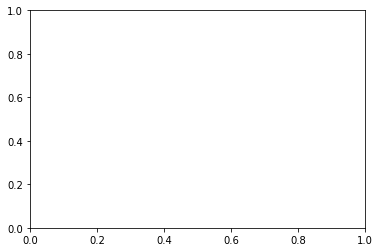

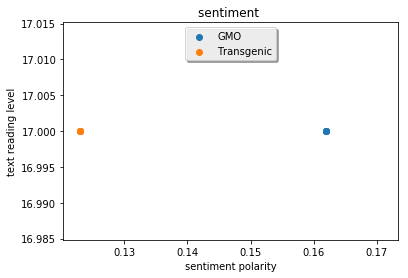

In [31]:

import seaborn as sns
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'

ses = list(se.values())
search_query = str('Vaccine')
search_query = ['GMO','Transgenic']
xx=[]
yy=[]
for outer,sq in enumerate(search_query):    
    x = []
    y = []
    for i,v in enumerate(ses):
        complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v and f['urlDat']['link_rank'] == 0 ]
        #complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v and f['urlDat']['link_rank'] == 0 ]
        sent = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] == sq and f['urlDat']['se'] == v and f['urlDat']['link_rank'] == 0 ]
        if len(complexity)>0:
            comp = float(complexity[0])
        else:
            comp = 0
        if len(sent)>0:
            sent = float(sent[0])
        else:
            sent = 0
    
        xx.append(i)
        y.append((comp,sent))    
    yy.append(y)
print(len(complexity),len(rank))
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
plt.clf()
fig, ax = plt.subplots()

#f, axarr = plt.subplots(1, sharex=True)
ind = [i for i,v in enumerate(ses)]
offset = [(i+width)/2.0 for i,v in enumerate(ses)]



fig, ax = plt.subplots()
plt.title(str('sentiment '))#+search_query)
plt.ylabel('text reading level')
plt.xlabel('sentiment polarity')
#lineObjects = 
sentt0 = [sent[1] for sent in yy[0] ]
complexity0 = [sent[0] for sent in yy[0] ]
plt.scatter(sentt0,complexity0,label='GMO')
sentt1 = [sent[1] for sent in yy[1] ]
complexity1 = [sent[0] for sent in yy[0] ]
plt.scatter(sentt1,complexity1,label='Transgenic')


legend = ax.legend(loc='upper center', shadow=True)
#plt.savefig('Figure2{0}{1}.png'.format(search_query[0],search_query[1]))
plt.show()


In [ ]:

'''
print(X[0])
import pdb
pdb.set_trace()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=25)
rfr.fit(X,y)
lm



num_estimators = 2**np.arange(0,8)
cross_val_scores = np.empty_like(num_estimators).astype('float')
for i,n_estimators in enumerate(num_estimators):
    rfr = RandomForestRegressor(n_estimators=n_estimators,max_features=4)
    cross_val_scores[i] = cross_val_score(rfr,features,target,cv=25,scoring=scorer).mean()
plt.plot(num_estimators,cross_val_scores)
plt.xscale('log')
plt.xlabel('Number of decision trees')
plt.ylabel('Correlation between predicted and actual values')
plt.title('Random Forest Performance');
'''